Let's start with just getting camb installed and setting up a few things we may need

We are going to be using CAMB to generate our CMB power spectra, the documentation for that can be found. Docs are [here](https://camb.readthedocs.io/en/latest/index.html)

A demo workbook can be seen [here](https://camb.readthedocs.io/en/latest/CAMBdemo.html)

In [ ]:
!pip install camb
import matplotlib.pyplot as plt
import numpy as np
import camb
#from camb import model, initialpower



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
pars = camb.CAMBparams()
lmax = 4000
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.05)

pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(lmax, lens_potential_accuracy=1)

results = camb.get_results(pars)

powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']


Let's plot the result, just to make sure it makes sense. Here I just plot the unlensed TT power, you could also plot the TE, EE, and BB spectra

(4051,)
(4051,)


Text(0, 0.5, 'Cl')

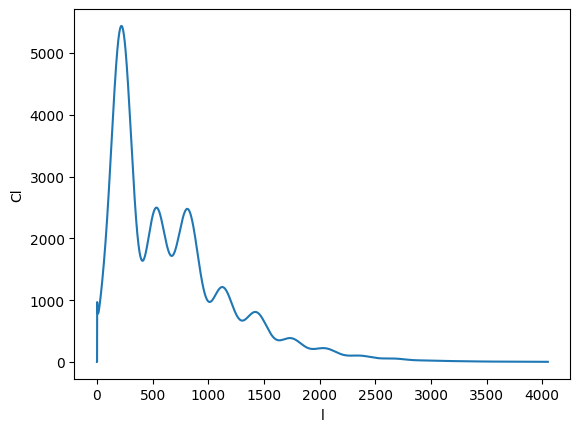

In [ ]:
ells = np.arange(unlensedCL[:,0].shape[0])
print(ells.shape)
print(unlensedCL[:,0].shape)
plt.plot(ells, unlensedCL[:,0])
plt.xlabel('l')
plt.ylabel('Cl')


In [ ]:
powers.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [ ]:
angles = np.geomspace(0.1,179,200)   # in degrees
xvals = np.cos(angles*np.pi/180)
from camb import correlations
c_camb = correlations.cl2corr(unlensedCL, xvals, lmax=2000)


Let's plot the correlation functions.
CAMB also produced the correlation functions for other correlations, those could be useful to plot as well (up to you).

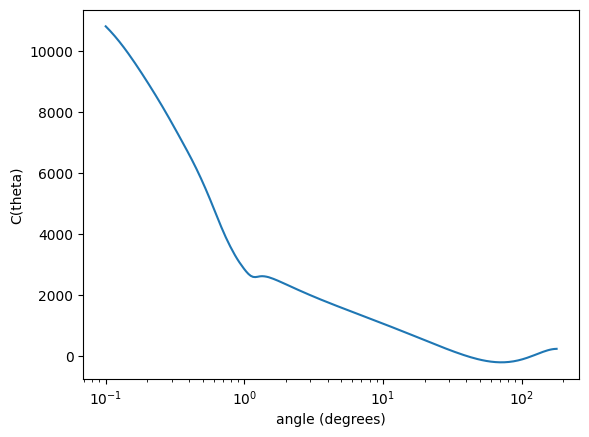

In [ ]:
plt.xlabel('angle (degrees)')
plt.ylabel('C(theta)')
plt.xscale('log')   #or not, try linear or log
plt.plot(angles, c_camb[:,0])

Yikes. That looks not great. Where is the sound horizon signature? Notice that there is non-zero correlation on very large scales, thanks inflation!

Maybe scaling by a factor of the angle will make this look better. Where is the acoustic peak here?

It may become a bit easier to see what is going on if you cut out the low ell bits from the calculation, maybe try a higher lmin? What is going on is that far and away the dominant feature of the CMB is that it has a lot of spatial power on large scales (it is very red) that tends to dominate visual features in map space

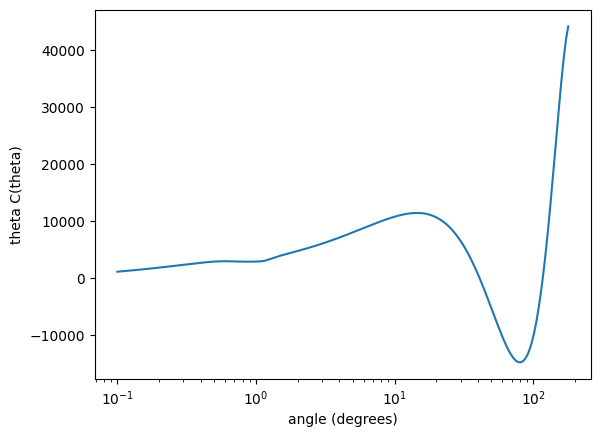

In [ ]:
plt.plot(angles, angles*c_camb[:,0])
plt.xlabel('angle (degrees)')
plt.ylabel('theta C(theta)')
plt.xscale('log')



You could keep going and download the Planck power spectrum, and see how that correlation function looks. To download the Planck power spectrum, you can use the next cell in this notebook to get started. We didn't start with exactly the Planck best fit cosmology, so it isn't a perfect match.

--2024-09-02 07:14:56--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-binary]
Saving to: ‘COM_PowerSpect_CMB-TT-full_R3.01.txt’

COM_PowerSpect_CMB-     [    <=>             ] 166.55K   171KB/s    in 1.0s    

2024-09-02 07:14:57 (171 KB/s) - ‘COM_PowerSpect_CMB-TT-full_R3.01.txt’ saved [170547]



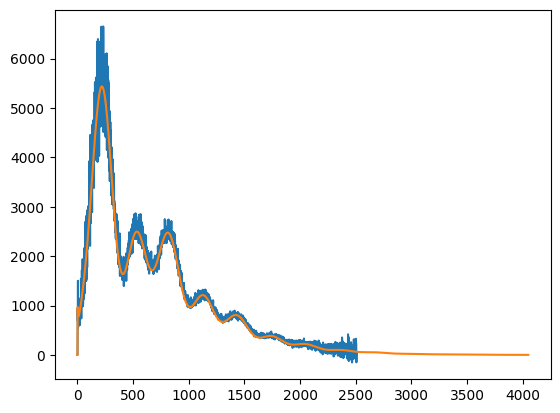

In [ ]:
!wget -O COM_PowerSpect_CMB-TT-full_R3.01.txt "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt"
l, dl = np.genfromtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',usecols=(0,1),unpack=True)

planck_l = np.insert(l,0,[0,1])
planck_dl = np.insert(dl,0,[0,0])
plt.plot(planck_l,planck_dl)
plt.plot(ells, unlensedCL[:,0])



In [ ]:
print(planck_dl.shape)

(2509,)
